In [1]:
import pandas as pd
import numpy as np
import pyreadr
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Modelo de Regressão Logítica Binária e Procediemento Stepwise

Exmplo da aula do MBA DSA USP/ESALQ com Prof. Luiz Fávero


**Modelo de Classificação**

### Objetivo

Predizer a probabilidade de ocorrer um evento em função de uma ou mais variáveis explicativas ou classificar uma observação em alguma categoria específica.

- **Variável Dependente:** Binária Qualitativa
- **Variável Explicativa:** métrica ou não métrica

### Contexto

Ônibus Espacial Challenger explodiu 73 segundos após o lançamento.

Evento Falha no anel do tanque de combustível sólido

23 Ensaios da contração ou não do anel de vedação.

Desgaste: quantidade de vezes que ocorreu stress térmico <br>
Temperatura <br>
Pressão <br>
t: ensaios

falha (quali) ~ temp (quant) + pressao (quant)

Patrasado = 1/ 1 + e^-(alpha + Btemp + Bpressao)


**Padrão da variável Binária Dependente** <br>
Y = 1 evento <br>
Y = 0 não evento <br>

Evento: categoria alternativa <br>
Não Evento: categoria referência

In [2]:
#Importa base e transforma em objeto
rData = pyreadr.read_r(r'bases\challenger.RData')

#Verifica o nomne do objeto
print(rData.keys())

odict_keys(['challenger'])


In [3]:
#Transforma o objeto em um pandas DataFrame
df_challenger = rData['challenger']

df_challenger.head(10)

,desgaste,temperatura,pressão,t
0,0,66,50,1
1,1,70,50,2
2,0,69,50,3
3,0,68,50,4
4,0,67,50,5
5,0,72,50,6
6,0,73,100,7
7,0,70,100,8
8,1,57,200,9
9,1,63,200,10


In [4]:
df_challenger.describe()

,desgaste,temperatura,pressão
count,23.000000,23.000000,23.000000
mean,0.304348,69.565217,152.173913
std,0.558796,7.057080,68.221332
min,0.000000,53.000000,50.000000
25%,0.000000,67.000000,75.000000
50%,0.000000,70.000000,200.000000
75%,0.500000,75.000000,200.000000
max,2.000000,81.000000,200.000000


In [5]:
# Criando campo qualitativo falha
df_challenger.loc[df_challenger['desgaste'] == 0, 'falha'] = int(0)
df_challenger.loc[df_challenger['desgaste'] != 0, 'falha'] = int(1)

In [6]:
df_challenger

,desgaste,temperatura,pressão,t,falha
0,0,66,50,1,0.0
1,1,70,50,2,1.0
2,0,69,50,3,0.0
3,0,68,50,4,0.0
4,0,67,50,5,0.0
5,0,72,50,6,0.0
6,0,73,100,7,0.0
7,0,70,100,8,0.0
8,1,57,200,9,1.0
9,1,63,200,10,1.0


In [7]:
df_challenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   desgaste     23 non-null     int32   
 1   temperatura  23 non-null     int32   
 2   pressão      23 non-null     int32   
 3   t            23 non-null     category
 4   falha        23 non-null     float64 
dtypes: category(1), float64(1), int32(3)
memory usage: 1.3 KB


In [8]:
# Função que transforma Farenheit em Celsius
def celsius (f):
    return print(5*((f-32)/9))

In [9]:
# No dia a temeperatura estava em 34o F
celsius(34)

1.1111111111111112


## Aplicando Modelo Logístico

O modelo que apresentar o MAIOR Log-Likelihood é o mais ajustado.

In [10]:
import statsmodels.api as sm

# Caso for usar a função sem a formula
X = df_challenger[['temperatura', 'pressão']]
y = df_challenger.falha

#Adiciona coluna para cálculo da constante
X = sm.add_constant(X)

modelo_challenger = sm.Logit(y,X).fit()

#Função com Formula
#modelo_challenger = sm.Logit.from_formula(formula='falha ~ temperatura + pressão', data=df_challenger).fit()
modelo_challenger.summary()

Optimization terminated successfully.
         Current function value: 0.305063
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  falha   No. Observations:                   23
Model:                          Logit   Df Residuals:                       20
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                  0.4685
Time:                        17:50:50   Log-Likelihood:                -7.0164
converged:                       True   LL-Null:                       -13.201
Covariance Type:            nonrobust   LLR p-value:                  0.002061
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.8436     11.936      1.830      0.067      -1.551      45.239
temperatura    -0.3501      0.173     -2.024      0.043      -0.689      -0.011
pressão         0.0060      0.010      0.616      0.538      -0.013       0.025
===============================================================================
"""

## Indicadores

Compara modelos levando em consideração a quantidade do tamanho da amostra e variáveis

- #### Akaike Info Criterion: Quanto menor Melhor
    - Análogo ao R2 Ajustado
    - AIC = -2 LLmodelo + 2(K+1) onde k = qtde de betas
    
- #### Bayesian Info Criterion: Quanto menor Melhor
    - BIC = -2LLmodelo + (k+1)ln(n)

In [11]:
list_ = [modelo_challenger.llr.round(3), 
         modelo_challenger.llr_pvalue.round(5),
         modelo_challenger.llf.round(3),
         modelo_challenger.aic,
         modelo_challenger.bic]

summary = pd.DataFrame(list_, index=[['chi2', 'p', 'Log-Likelihood','AIC', 'BIC']], columns=['values'])

summary

,values
chi2,12.369000
p,0.002060
Log-Likelihood,-7.016000
AIC,20.032893
BIC,23.439376


## Stepwise

Pressão não passou ao nível de 95% de confiança com p-value de 0,538

In [12]:
from stepwise_process.statsmodels import stepwise

step_challenger = stepwise(modelo_challenger, pvalue_limit=0.05)
step_challenger.summary

Regression type: Logit 

Estimating model...: 
 falha ~ temperatura + pressão
Optimization terminated successfully.
         Current function value: 0.305063
         Iterations 8

 Discarding atribute "pressão" with p-value equal to 0.5378022290437214 

Estimating model...: 
 falha ~ temperatura
Optimization terminated successfully.
         Current function value: 0.313604
         Iterations 8

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'pressão', 'p-value': 0.5378022290437214}

 Model after stepwise process...: 
 falha ~ temperatura 

                           Logit Regression Results                           
Dep. Variable:                  falha   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                  0.453

<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x0000024A0E068C40>>

### Modelo: 1/1+exp(-(23.77 - 0.366*temp))

quanto maior a temperatura menor a prob de falha <br>
quanto menor a temperatura maior a prob de falha

In [13]:

step_challenger = sm.Logit(y,sm.add_constant(X.temperatura)).fit()

Optimization terminated successfully.
         Current function value: 0.313604
         Iterations 8


In [14]:
step_challenger.predict([1,34])

array([0.99998772])

## Curva ROC ( Receiver Operating Characterist)

Maior a área debaixo da curva ROC melhor. <br>

Para aumentar a área é necessário incluir novas variáveis com betas estatisticamente significantes após stepwise

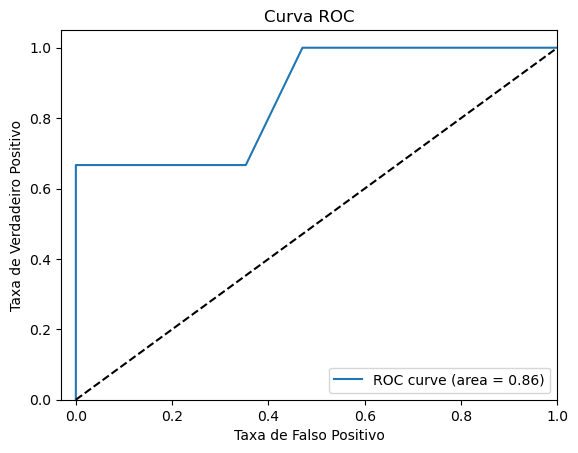

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y, step_challenger.fittedvalues)
roc_auc = roc_auc_score(y, step_challenger.fittedvalues)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Linha de referência
plt.xlim([-0.03, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()